In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import FunctionTransformer,PowerTransformer
from sklearn.model_selection import train_test_split
import scipy.stats as ss
from mixed_naive_bayes import MixedNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,FunctionTransformer
from sklearn.compose import ColumnTransformer
import pickle

In [31]:
Data1=pd.read_csv(r"C:\Users\Hi\Downloads\drug200.csv") #Loading the data

In [32]:
Data=Data1.copy()

In [33]:
Data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [34]:
Data["Drug"]=Data["Drug"].map({"drugA":0,"drugB":1,"drugC":2,"drugX":3,"DrugY":4})

In [35]:
fv=Data.iloc[:,0:5]
cv=Data.iloc[:,-1]

In [36]:
Data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,4
1,47,M,LOW,HIGH,13.093,2
2,47,M,LOW,HIGH,10.114,2
3,28,F,NORMAL,HIGH,7.798,3
4,61,F,LOW,HIGH,18.043,4
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,2
196,16,M,LOW,HIGH,12.006,2
197,52,M,NORMAL,HIGH,9.894,3
198,23,M,NORMAL,NORMAL,14.020,3


### Splitting the data

In [37]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2)

In [38]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
33,65,F,HIGH,NORMAL,31.876
96,58,F,LOW,HIGH,38.247
103,56,M,NORMAL,HIGH,8.966
179,67,F,NORMAL,HIGH,15.891
125,19,F,HIGH,NORMAL,25.969
...,...,...,...,...,...
76,36,F,HIGH,HIGH,11.198
157,53,M,LOW,HIGH,22.963
47,68,M,LOW,HIGH,10.291
146,37,F,LOW,NORMAL,12.006


In [39]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 33 to 35
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          160 non-null    int64  
 1   Sex          160 non-null    object 
 2   BP           160 non-null    object 
 3   Cholesterol  160 non-null    object 
 4   Na_to_K      160 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.5+ KB


### EDA

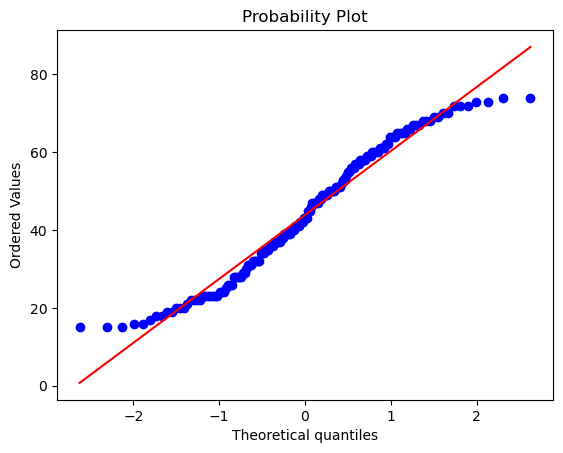

In [40]:
plt.subplot(111)
ss.probplot(x_train["Age"],dist='norm',fit=True,plot=plt)
plt.show()

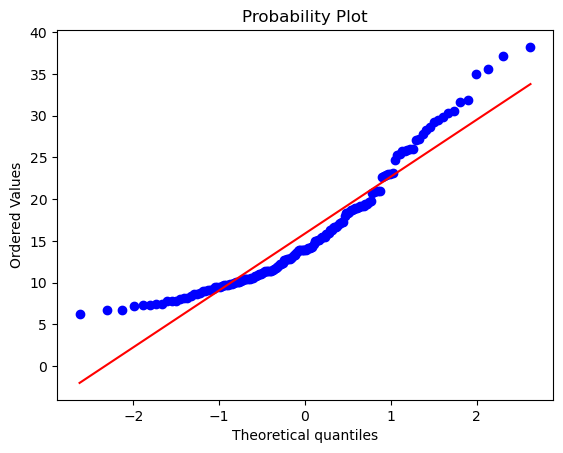

In [41]:
plt.subplot(111)
ss.probplot(x_train["Na_to_K"],dist='norm',fit=True,plot=plt)
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

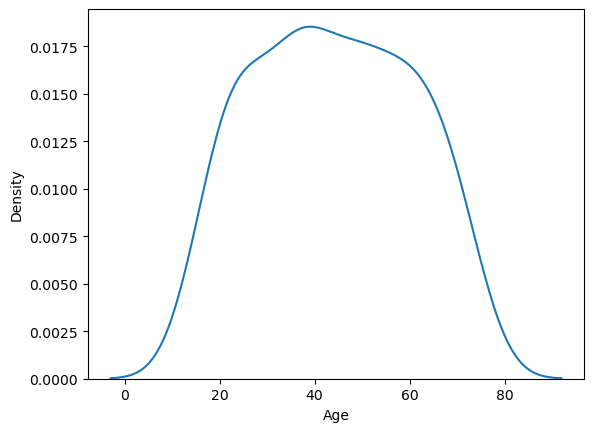

In [42]:
sns.kdeplot(x_train["Age"])

<Axes: xlabel='Na_to_K', ylabel='Density'>

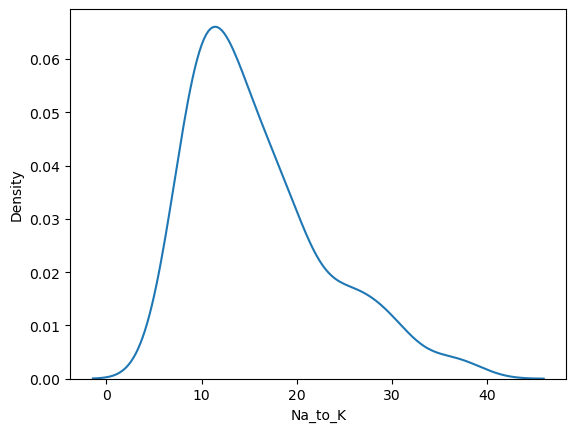

In [43]:
sns.kdeplot(x_train["Na_to_K"])

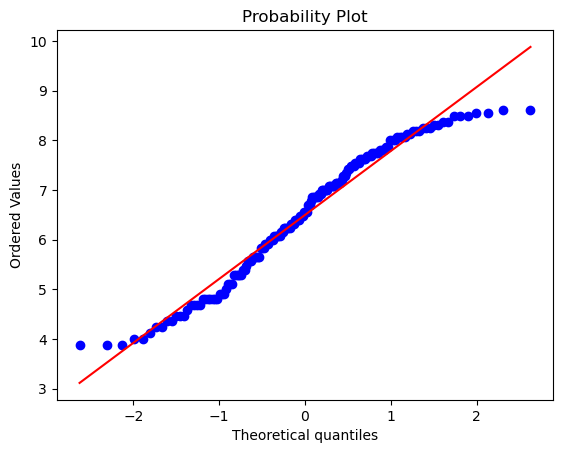

In [44]:
FT=FunctionTransformer(np.sqrt)
sqrt=FT.fit_transform(x_train["Age"])
plt.subplot(111)
ss.probplot(sqrt,dist='norm',fit=True,plot=plt)
plt.show()

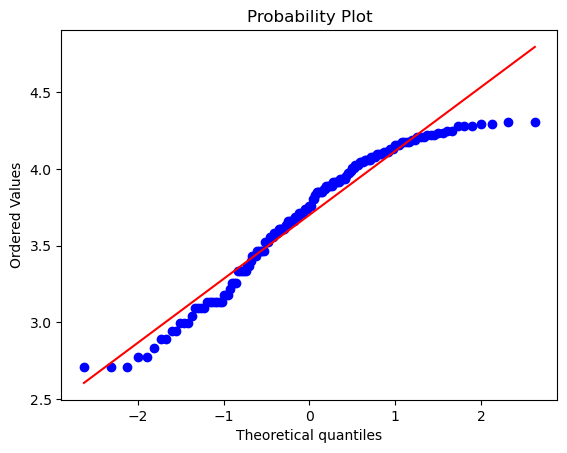

In [45]:
FT=FunctionTransformer(np.log)
sqrt=FT.fit_transform(x_train["Age"])
plt.subplot(111)
ss.probplot(sqrt,dist='norm',fit=True,plot=plt)
plt.show()

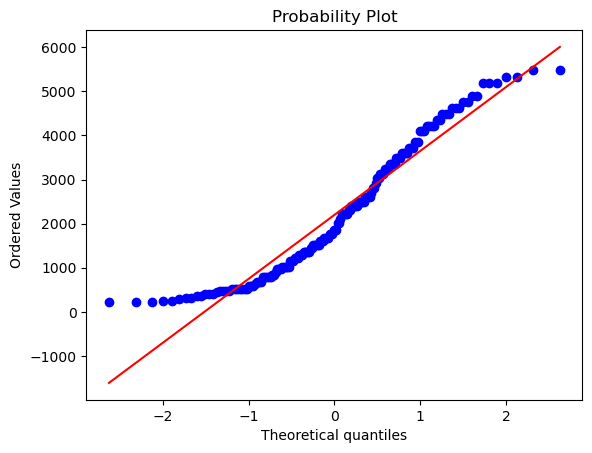

In [46]:
FT=FunctionTransformer(np.square)
sqrt=FT.fit_transform(x_train["Age"])
plt.subplot(111)
ss.probplot(sqrt,dist='norm',fit=True,plot=plt)
plt.show()

In [63]:
num_data=x_train.select_dtypes(include=["int64","float64"])
cat_data=x_train.select_dtypes(include=["object"])

In [64]:
np=Pipeline([("Imput_n",SimpleImputer()),("scaling",StandardScaler())])
cp=Pipeline([("Imput_c",SimpleImputer(strategy='most_frequent')),("encoding",OneHotEncoder())])

In [65]:
np

Pipeline(steps=[('Imput_n', SimpleImputer()), ('scaling', StandardScaler())])

In [66]:
cp

Pipeline(steps=[('Imput_c', SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder())])

In [67]:
pre_process=ColumnTransformer([("Numerical",np,num_data.columns),("cat",cp,cat_data.columns)],remainder="passthrough")

In [68]:
pre_process

ColumnTransformer(remainder='passthrough',
                  transformers=[('Numerical',
                                 Pipeline(steps=[('Imput_n', SimpleImputer()),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['Age', 'Na_to_K'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('Imput_c',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OneHotEncoder())]),
                                 Index(['Sex', 'BP', 'Cholesterol'], dtype='object'))])

In [69]:
pr=pre_process.fit_transform(x_train)

In [70]:
pre_process.get_feature_names_out()

array(['Numerical__Age', 'Numerical__Na_to_K', 'cat__Sex_F', 'cat__Sex_M',
       'cat__BP_HIGH', 'cat__BP_LOW', 'cat__BP_NORMAL',
       'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL'], dtype=object)

In [71]:
finalpipeline=Pipeline([("data",pre_process)])

In [72]:
finalpipeline

Pipeline(steps=[('data',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical',
                                                  Pipeline(steps=[('Imput_n',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Na_to_K'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('Imput_c',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  Index(['Sex', 'BP', 'Cholesterol'], dtype='object'))]))])

In [73]:
finalpipeline.fit_transform(x_train)

array([[ 1.28063549,  2.26713313,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.85578011,  3.17083844,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.73439286, -0.98257474,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 1.46271637, -0.79462787,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.41878601, -0.55136078,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.12745661, -1.22101904,  0.        , ...,  1.        ,
         0.        ,  1.        ]])

### Training

In [74]:
alrthm=MixedNB(categorical_features=[2,3,4,5,6,7,8])

In [75]:
model=alrthm.fit(finalpipeline.fit_transform(x_train),y_train)
model

MixedNB(alpha=0.5, var_smoothing=1e-09)

In [76]:
pickle.dump(finalpipeline,open(r"C:\Users\Hi\Desktop\ML\drugpre.pkl","wb"))
pickle.dump(model,open(r"C:\Users\Hi\Desktop\ML\drugmodel.pkl","wb"))

In [77]:
pre=pickle.load(open(r"C:\Users\Hi\Desktop\ML\drugpre.pkl","rb"))
model=pickle.load(open(r"C:\Users\Hi\Desktop\ML\drugmodel.pkl","rb"))

### Testing

In [78]:
model.predict(finalpipeline.transform(x_test))

array([4, 3, 4, 3, 0, 0, 4, 3, 0, 4, 3, 4, 2, 1, 4, 4, 2, 4, 4, 3, 4, 2,
       1, 2, 4, 0, 4, 4, 3, 0, 3, 0, 1, 1, 4, 4, 3, 4, 4, 1], dtype=int64)